In [313]:
import numpy as np
import pandas as pd

df = pd.read_csv('test4.csv')
df

,식당명,분류명,행정동명,경도,위도,평점,방문자리뷰수
0,카페드파리,카페,명동,37.562711,126.983746,4.26,345
1,몰또이탈리안에소프레소바,카페,명동,37.564577,126.986213,4.41,5426
2,르빵명동성당점,카페,명동,37.563240,126.987005,4.47,694
3,가배도명동,카페,명동,37.560576,126.985138,4.44,616
4,명동아지트,카페,명동,37.561961,126.985403,3.00,175
5,리사르커피명동점,카페,명동,37.561959,126.988225,3.50,823
6,스타벅스레스케이프호텔R점,카페,명동,37.560091,126.979491,4.55,1772
7,AboutBagel,카페,명동,37.564774,126.983145,2.70,148
8,커피한약방,카페,명동,37.566757,126.988612,4.42,3830
9,카페구할구,카페,명동,37.558633,126.987030,1.10,501


In [314]:
df.columns= ['name',
             'cate',
             'dong',
             'lon',
             'lat',
             'score',
             'review',
             ]
df

,name,cate,dong,lon,lat,score,review
0,카페드파리,카페,명동,37.562711,126.983746,4.26,345
1,몰또이탈리안에소프레소바,카페,명동,37.564577,126.986213,4.41,5426
2,르빵명동성당점,카페,명동,37.563240,126.987005,4.47,694
3,가배도명동,카페,명동,37.560576,126.985138,4.44,616
4,명동아지트,카페,명동,37.561961,126.985403,3.00,175
5,리사르커피명동점,카페,명동,37.561959,126.988225,3.50,823
6,스타벅스레스케이프호텔R점,카페,명동,37.560091,126.979491,4.55,1772
7,AboutBagel,카페,명동,37.564774,126.983145,2.70,148
8,커피한약방,카페,명동,37.566757,126.988612,4.42,3830
9,카페구할구,카페,명동,37.558633,126.987030,1.10,501


In [306]:
import numpy as np

food_score = np.array([4.26, 4.41, 4.47, 4.44, 3, 3.5, 4.55, 2.7, 4.42, 1.1, 4.42, 4.35, 4.49, 4.06, 4.44, 4.22, 4.43, 4.35, 4.35, 4.41, 4.56])

food_reviews = np.array([345, 5426, 694, 616, 175, 823, 1772, 148, 3830, 501, 12711, 2188, 2577, 3654, 4859, 3279, 4859, 3279, 4858, 1106, 2993, 887, 3889])

In [307]:
from sklearn.model_selection import train_test_split

# 훈련세트와 테스트세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(food_score, food_reviews, random_state=42)

# 훈련세트와 테스트세트를 2차원 배열로 바꾸기
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [308]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

print(knr.predict([[5]]))

[1027.33333333]


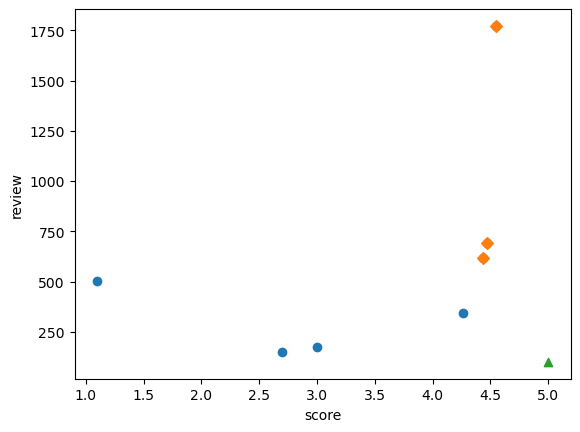

In [312]:
import matplotlib.pyplot as plt

# 별점 5점에 가게를 구한다.
distances, indexes = knr.kneighbors([[5]])

# 훈련세트의 산점도를 그린다.
plt.scatter(train_input, train_target)

# 훈련세트 중에서 이웃 샘플만 다시 그린다.
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 5점짜리 가게 데이터
plt.scatter(5, 100, marker='^')
plt.xlabel('score')
plt.ylabel('review')
plt.show()

In [304]:
print(np.mean(train_target[indexes]))

1027.3333333333333


In [305]:
print(knr.predict([[5]]))

[1027.33333333]
